In [1]:
import os
from preamble import get_args, get_tokenizer, get_all_datasets, get_model, prepare_train_args, get_trainer

/home/ny/anaconda3/envs/hf/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
os.environ['NCCL_IB_DISABLE'] = '1'
os.environ['NCCL_P2P_DISABLE'] = '1'
os.environ['CUDA_VISIBLE_DEVICES'] = '1'

In [3]:
import shlex
import sys
# AssertionError: You must provide the same number of values for op_eval, op_dist_eval, format_eval, and n_digits_eval
argv = shlex.split("""
    --report_to="none" \
    --architecture=llama \
    --hidden_size=384 \
    --num_attention_heads=6 \
    --num_layers=6 \
    --max_position_embeddings=1024 \
    \
    \
    --n_digits_train='1,20' \
    --op_train='add' \
    --format_train='reverse' \
    --n_digits_eval='1,33,1' \
    --op_eval='add' \
    --format_eval='reverse' \
    \
    \
    --run_name='test' \
    --resume_from_checkpoint='out/reverse-llama-384-6-6-1024-reverse-digits-1_17_/checkpoint-5000' \
    --output_dir=out \
    --do_train=False \
    --do_eval=True \
    --max_steps=5000 \
    --learning_rate=5e-4 \
    --lr_scheduler_type='cosine' \
    --warmup_ratio=0.05 \
    --logging_steps=20 \
    --eval_strategy="steps" \
    --eval_steps=200 \
    --predict_with_generate \
    --per_device_train_batch_size=1024 \
    --per_device_eval_batch_size=100 \
    --gradient_accumulation_steps=2 \
    --include_inputs_for_metrics=True \
    --tf32=True \
    --torch_compile=True
""")
#     --bf16=True \


sys.argv = sys.argv[:1] + argv
print(sys.argv)


['/home/ny/anaconda3/envs/hf/lib/python3.10/site-packages/ipykernel_launcher.py', '--report_to=none', '--architecture=llama', '--hidden_size=384', '--num_attention_heads=6', '--num_layers=6', '--max_position_embeddings=1024', '--n_digits_train=1,20', '--op_train=add', '--format_train=reverse', '--n_digits_eval=1,33,1', '--op_eval=add', '--format_eval=reverse', '--run_name=test', '--resume_from_checkpoint=out/reverse-llama-384-6-6-1024-reverse-digits-1_17_/checkpoint-5000', '--output_dir=out', '--do_train=False', '--do_eval=True', '--max_steps=5000', '--learning_rate=5e-4', '--lr_scheduler_type=cosine', '--warmup_ratio=0.05', '--logging_steps=20', '--eval_strategy=steps', '--eval_steps=200', '--predict_with_generate', '--per_device_train_batch_size=1024', '--per_device_eval_batch_size=100', '--gradient_accumulation_steps=2', '--include_inputs_for_metrics=True', '--tf32=True', '--torch_compile=True']


In [4]:
args, model_args, data_args, train_args = get_args()

tokenizer = get_tokenizer(model_args, data_args)

train_dataset, eval_datasets = get_all_datasets(train_args, data_args, tokenizer)

model = get_model(train_args, model_args, tokenizer)

train_args = prepare_train_args(train_args, model_args, data_args, tokenizer)

trainer = get_trainer(args, data_args, model_args, model, tokenizer, train_args, train_dataset, eval_datasets)

/home/ny/anaconda3/envs/hf/lib/python3.10/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
Map: 100%|██████████| 96/96 [00:00<00:00, 11208.16 examples/s]


----------- Examples from eval: -------------
[3, 34, 64, 78, 59, 86]
[BOS]C6+1=
[65, 58, 1]
70[EOS]
dict_keys(['eval_input_ids', 'eval_attention_mask', 'eval_labels', 'eval_loss_mask'])
[3, 34, 58, 64, 78, 62, 64, 86]
[BOS]C06+46=
[62, 60, 59, 1]
421[EOS]
dict_keys(['eval_input_ids', 'eval_attention_mask', 'eval_labels', 'eval_loss_mask'])
[3, 34, 63, 58, 64, 78, 64, 65, 63, 86]
[BOS]C506+675=
[59, 66, 59, 59, 1]
1811[EOS]
dict_keys(['eval_input_ids', 'eval_attention_mask', 'eval_labels', 'eval_loss_mask'])
[3, 34, 62, 63, 58, 64, 78, 60, 62, 64, 66, 86]
[BOS]C4506+2468=
[64, 67, 64, 62, 59, 1]
69641[EOS]
dict_keys(['eval_input_ids', 'eval_attention_mask', 'eval_labels', 'eval_loss_mask'])
[3, 34, 65, 62, 63, 58, 64, 78, 65, 65, 60, 62, 65, 86]
[BOS]C74506+77247=
[62, 60, 66, 62, 61, 59, 1]
428431[EOS]
dict_keys(['eval_input_ids', 'eval_attention_mask', 'eval_labels', 'eval_loss_mask'])
[3, 34, 64, 65, 62, 63, 58, 64, 78, 63, 60, 65, 65, 60, 63, 86]
[BOS]C674506+527725=
[59, 58, 60, 6

max_steps is given, it will override any value given in num_train_epochs


Number of parameters: 24856704
Number of trainable parameters: 24856704


In [5]:
trainer._load_from_checkpoint(resume_from_checkpoint=train_args.resume_from_checkpoint)


In [6]:
model

LlamaForCausalLMWithNoPE(
  (model): LlamaModelWithNoPE(
    (embed_tokens): Embedding(103, 384)
    (layers): ModuleList(
      (0-5): 6 x LlamaDecoderLayer(
        (self_attn): LlamaSdpaAttention(
          (q_proj): Linear(in_features=384, out_features=384, bias=False)
          (k_proj): Linear(in_features=384, out_features=384, bias=False)
          (v_proj): Linear(in_features=384, out_features=384, bias=False)
          (o_proj): Linear(in_features=384, out_features=384, bias=False)
          (rotary_emb): LlamaRotaryEmbedding()
        )
        (mlp): LlamaMLP(
          (gate_proj): Linear(in_features=384, out_features=3072, bias=False)
          (up_proj): Linear(in_features=384, out_features=3072, bias=False)
          (down_proj): Linear(in_features=3072, out_features=384, bias=False)
          (act_fn): SiLU()
        )
        (input_layernorm): LlamaRMSNorm((384,), eps=1e-06)
        (post_attention_layernorm): LlamaRMSNorm((384,), eps=1e-06)
      )
    )
    (norm): 

In [7]:
result = trainer.evaluate()


Prompt: '[BOS]C6+1='
Pred  : '70[EOS]'
Label : '70[EOS]'
Prompt: '[BOS]C8+7='
Pred  : '51[EOS]'
Label : '51[EOS]'
Prompt: '[BOS]C8+8='
Pred  : '61[EOS]'
Label : '61[EOS]'
Prompt: '[BOS]C3+9='
Pred  : '21[EOS]'
Label : '21[EOS]'
Prompt: '[BOS]C1+2='
Pred  : '30[EOS]'
Label : '30[EOS]'
Prompt: '[BOS]C06+46='
Pred  : '421[EOS]'
Label : '421[EOS]'
Prompt: '[BOS]C25+78='
Pred  : '931[EOS]'
Label : '931[EOS]'
Prompt: '[BOS]C83+48='
Pred  : '221[EOS]'
Label : '221[EOS]'
Prompt: '[BOS]C46+97='
Pred  : '341[EOS]'
Label : '341[EOS]'
Prompt: '[BOS]C34+18='
Pred  : '421[EOS]'
Label : '421[EOS]'
Prompt: '[BOS]C506+675='
Pred  : '1811[EOS]'
Label : '1811[EOS]'
Prompt: '[BOS]C278+826='
Pred  : '0051[EOS]'
Label : '0051[EOS]'
Prompt: '[BOS]C511+965='
Pred  : '4860[EOS]'
Label : '4860[EOS]'
Prompt: '[BOS]C734+022='
Pred  : '7560[EOS]'
Label : '7560[EOS]'
Prompt: '[BOS]C219+696='
Pred  : '8061[EOS]'
Label : '8061[EOS]'
Prompt: '[BOS]C4506+2468='
Pred  : '69641[EOS]'
Label : '69641[EOS]'
Prompt: '[BOS]C8

In [8]:
result

{'eval_1-add-reverse_model_preparation_time': 0.7147,
 'eval_1-add-reverse_accuracy': 1.0,
 'eval_1-add-reverse_distance': 1.0,
 'eval_1-add-reverse_runtime': 1.114,
 'eval_1-add-reverse_samples_per_second': 86.178,
 'eval_1-add-reverse_steps_per_second': 0.898,
 'eval_2-add-reverse_model_preparation_time': 0.7147,
 'eval_2-add-reverse_accuracy': 1.0,
 'eval_2-add-reverse_distance': 1.0,
 'eval_2-add-reverse_runtime': -0.49,
 'eval_2-add-reverse_samples_per_second': -195.909,
 'eval_2-add-reverse_steps_per_second': -2.041,
 'eval_3-add-reverse_model_preparation_time': 0.7147,
 'eval_3-add-reverse_accuracy': 1.0,
 'eval_3-add-reverse_distance': 1.0,
 'eval_3-add-reverse_runtime': -0.4805,
 'eval_3-add-reverse_samples_per_second': -199.81,
 'eval_3-add-reverse_steps_per_second': -2.081,
 'eval_4-add-reverse_model_preparation_time': 0.7147,
 'eval_4-add-reverse_accuracy': 1.0,
 'eval_4-add-reverse_distance': 1.0,
 'eval_4-add-reverse_runtime': -0.4846,
 'eval_4-add-reverse_samples_per_sec

Text(0.5, 1.0, 'reverse-llama-384-6-6')

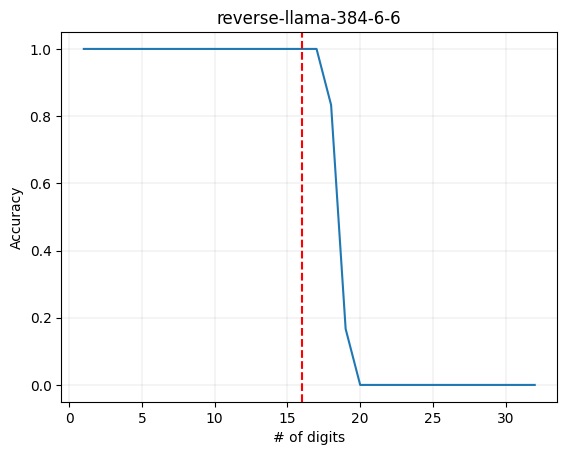

In [9]:
# plot the results: n (digits) vs.  "eval_n-add-reverse_accuracy" 
import matplotlib.pyplot as plt
import numpy as np

n_digits = np.arange(1, 33)
accuracy = [result[f"eval_{n}-add-reverse_accuracy"] for n in n_digits]
plt.plot(n_digits, accuracy)
# plot a vertical line at n = 16
plt.axvline(x=16, color='r', linestyle='--')
plt.xlabel('# of digits')
plt.ylabel('Accuracy')
# add grid with weak grey lines
plt.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)
plt.title('reverse-llama-384-6-6')

In [13]:
# now let's evaluate with beam search (num_beams = 5)
import copy
new_args = copy.deepcopy(args)
new_args.num_beams = 10
new_args.num_return_sequences = 10
# print all in new_args
for k, v in new_args.__dict__.items():
    print(f"{k}: {v}")



foo: bar
do_dpo: False
ref_model: False
ref_model_path: None
dpo_beta: 0.5
num_beams: 10
num_return_sequences: 10


In [7]:
def get_reverse_answer(input):
    # remove "[BOS]" if input starts with it
    if input.startswith(tokenizer.bos_token):
        input = input[5:]
    a, b = input[1:-1].split('+')
    len_a, len_b = len(a), len(b)
    l = max(len_a, len_b)
    a, b = int(a[::-1]), int(b[::-1])
    c = str(a + b)
    c = c[::-1].ljust(l+1, '0')

    return tokenizer.bos_token+input+c, max(len_a, len_b)

def get_prob(sequence_scores):
    import math
    n = len(sequence_scores)
    new_scores = []
    for i in range(n):
        new_scores.append(math.exp(sequence_scores[i]))

    return new_scores

def get_beam_outputs(beam_output):
    n = len(beam_output)
    outputs = []
    for i in range(n):
        # remove "[PAD]" at the end if output ends with it
        outputs.append(tokenizer.decode(beam_output[i]).replace(tokenizer.pad_token, ''))
    
    return outputs

def print_beam_output(input, beam_output):
    correct, addition_length = get_reverse_answer(input)
    prob = get_prob(beam_output['sequences_scores'])
    out_seq = get_beam_outputs(beam_output['sequences'])

    print("Answer:\n" + correct + "\t | \t addition length:", addition_length)
    print("Output:\n" + 100 * '-')
    for i in range(len(out_seq)):
        print(out_seq[i] + "\t | \t"+ str(prob[i]))
        # check if out_seq begins with correct + tokenizer.eos_token
        if out_seq[i].startswith(correct + tokenizer.eos_token):
            print("CORRECT!")


In [189]:
print(get_reverse_answer("C318133906861+144453667759="))
print(get_prob(beam_output['sequences_scores']))
print(get_beam_outputs(beam_output['sequences']))

('[BOS]C318133906861+144453667759=4526865736211', 12)
[0.9999502922422974, 0.45189550420005303, 0.4430638554423597, 0.43852898183893063, 0.43493735599140226]
['[BOS]C318133906861+144453667759=4526865736211[EOS]', '[BOS]C318133906861+144453667759=4526865746211[EOS]', '[BOS]C318133906861+144453667759=452686573621[EOS]', '[BOS]C318133906861+144453667759=4526865736801[EOS]', '[BOS]C318133906861+144453667759=4526865736111[EOS]']


In [190]:
input = tokenizer.bos_token+"C318133906861+144453667759="
model_inputs = tokenizer(input, return_tensors='pt', padding='do_not_pad', add_special_tokens=False).to(model.device)
print(model_inputs)
print(input)
print(tokenizer.decode(model_inputs['input_ids'][0]))
if 'token_type_ids' in model_inputs:
    model_inputs.pop('token_type_ids')

{'input_ids': tensor([[ 3, 34, 61, 59, 66, 59, 61, 61, 67, 58, 64, 66, 64, 59, 78, 59, 62, 62,
         62, 63, 61, 64, 64, 65, 65, 63, 67, 86]], device='cuda:0'), 'token_type_ids': tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0]], device='cuda:0'), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1]], device='cuda:0')}
[BOS]C318133906861+144453667759=
[BOS]C318133906861+144453667759=


In [191]:
beam_output = model.generate(
    **model_inputs,
    max_new_tokens=20,
    num_beams=5,
    early_stopping=True,
    num_return_sequences=5,
    output_scores=True,
    return_dict_in_generate=True,
)

print(beam_output.keys())


odict_keys(['sequences', 'sequences_scores', 'scores', 'beam_indices', 'past_key_values'])


In [192]:
beam_output['sequences_scores']
# sum of log softmax of tokens during generation

tensor([-4.9709e-05, -7.9430e-01, -8.1404e-01, -8.2433e-01, -8.3255e-01],
       device='cuda:0')

In [193]:
print_beam_output(input, beam_output)

# correct, addition_length = get_reverse_answer(input)
# prob = get_prob(beam_output['sequences_scores'])
# out_seq = get_beam_outputs(beam_output['sequences'])

# print("Correct:\n", correct, "\n addition length:", addition_length)
# print("Output:\n" + 100 * '-')
# for i in range(len(out_seq)):
#     print(out_seq[i] + "\t | \t"+ str(prob[i]))

# print("Correct:\n", get_reverse_answer(input)[0], "\n addition length:", get_reverse_answer(input)[1])
# print("Output:\n" + 100 * '-')
# print(tokenizer.decode(beam_output[0]))#, skip_special_tokens=True))
# print(tokenizer.decode(beam_output[1]))#, skip_special_tokens=True))
# print(tokenizer.decode(beam_output[2]))#, skip_special_tokens=True))
# print(tokenizer.decode(beam_output[3]))#, skip_special_tokens=True))
# print(tokenizer.decode(beam_output[4]))#, skip_special_tokens=True))



Answer:
[BOS]C318133906861+144453667759=4526865736211	 | 	 addition length: 12
Output:
----------------------------------------------------------------------------------------------------
[BOS]C318133906861+144453667759=4526865736211[EOS]	 | 	0.9999502922422974
CORRECT!
[BOS]C318133906861+144453667759=4526865746211[EOS]	 | 	0.45189550420005303
[BOS]C318133906861+144453667759=452686573621[EOS]	 | 	0.4430638554423597
[BOS]C318133906861+144453667759=4526865736801[EOS]	 | 	0.43852898183893063
[BOS]C318133906861+144453667759=4526865736111[EOS]	 | 	0.43493735599140226


In [194]:
input = tokenizer.bos_token+"C8797+7334="
model_inputs = tokenizer(input, return_tensors='pt', padding='do_not_pad', add_special_tokens=False).to(model.device)

if 'token_type_ids' in model_inputs:
    model_inputs.pop('token_type_ids')

beam_output = model.generate(
    **model_inputs,
    max_new_tokens=20,
    num_beams=5,
    early_stopping=True,
    num_return_sequences=5,
    output_scores=True,
    return_dict_in_generate=True,
)


print_beam_output(input, beam_output)

Answer:
[BOS]C8797+7334=51321	 | 	 addition length: 4
Output:
----------------------------------------------------------------------------------------------------
[BOS]C8797+7334=51321[EOS]	 | 	0.9999549806582274
CORRECT!
[BOS]C8797+7334=51311[EOS]	 | 	0.14018946880638883
[BOS]C8797+7334=52321[EOS]	 | 	0.13730952142167668
[BOS]C8797+7334=51322[EOS]	 | 	0.13266875183722723
[BOS]C8797+7334=50321[EOS]	 | 	0.13042977638228342


In [195]:
input = tokenizer.bos_token+"C4782527724674506+5021733387964511="
model_inputs = tokenizer(input, return_tensors='pt', padding='do_not_pad', add_special_tokens=False).to(model.device)

if 'token_type_ids' in model_inputs:
    model_inputs.pop('token_type_ids')

beam_output = model.generate(
    **model_inputs,
    max_new_tokens=20,
    num_beams=5,
    early_stopping=True,
    num_return_sequences=5,
    output_scores=True,
    return_dict_in_generate=True,
)


print_beam_output(input, beam_output)

Answer:
[BOS]C4782527724674506+5021733387964511=97042601126490270	 | 	 addition length: 16
Output:
----------------------------------------------------------------------------------------------------
[BOS]C4782527724674506+5021733387964511=97042601126490270[EOS]	 | 	0.9999423591822179
CORRECT!
[BOS]C4782527724674506+5021733387964511=970426011264902710[EOS]	 | 	0.5854036107245447
[BOS]C4782527724674506+5021733387964511=97042601126490220[EOS]	 | 	0.5572524979793154
[BOS]C4782527724674506+5021733387964511=97042601126490170[EOS]	 | 	0.5460130330683676
[BOS]C4782527724674506+5021733387964511=97042601126390270[EOS]	 | 	0.5428288517888791


In [196]:
input = tokenizer.bos_token+"C3703139858006953+7023373324859381="
model_inputs = tokenizer(input, return_tensors='pt', padding='do_not_pad', add_special_tokens=False).to(model.device)

if 'token_type_ids' in model_inputs:
    model_inputs.pop('token_type_ids')

beam_output = model.generate(
    **model_inputs,
    max_new_tokens=20,
    num_beams=5,
    early_stopping=True,
    num_return_sequences=5,
    output_scores=True,
    return_dict_in_generate=True,
)


print_beam_output(input, beam_output)

Answer:
[BOS]C3703139858006953+7023373324859381=08264032829553450	 | 	 addition length: 16
Output:
----------------------------------------------------------------------------------------------------
[BOS]C3703139858006953+7023373324859381=08264032829553450[EOS]	 | 	0.9999388165834222
CORRECT!
[BOS]C3703139858006953+7023373324859381=08264032829553550[EOS]	 | 	0.5593314633563635
[BOS]C3703139858006953+7023373324859381=08264032829553451[EOS]	 | 	0.5544765632210165
[BOS]C3703139858006953+7023373324859381=08264032829553470[EOS]	 | 	0.5540167727121287
[BOS]C3703139858006953+7023373324859381=08264032829553150[EOS]	 | 	0.5516446139137098


In [197]:
input = tokenizer.bos_token+"C510478252772474506+921868950213338797="
model_inputs = tokenizer(input, return_tensors='pt', padding='do_not_pad', add_special_tokens=False).to(model.device)

if 'token_type_ids' in model_inputs:
    model_inputs.pop('token_type_ids')

beam_output = model.generate(
    **model_inputs,
    max_new_tokens=20,
    num_beams=5,
    early_stopping=True,
    num_return_sequences=5,
    output_scores=True,
    return_dict_in_generate=True,
)


print_beam_output(input, beam_output)

Answer:
[BOS]C510478252772474506+921868950213338797=4412472139857033041	 | 	 addition length: 18
Output:
----------------------------------------------------------------------------------------------------
[BOS]C510478252772474506+921868950213338797=4412472139857033041[EOS]	 | 	0.9991828516879646
CORRECT!
[BOS]C510478252772474506+921868950213338797=4412472139857033831[EOS]	 | 	0.7801685918491184
[BOS]C510478252772474506+921868950213338797=4412472139857033731[EOS]	 | 	0.7480256038539655
[BOS]C510478252772474506+921868950213338797=4412472139857033070[EOS]	 | 	0.7212355698308975
[BOS]C510478252772474506+921868950213338797=4412472139857033641[EOS]	 | 	0.6937524351392753


In [48]:
input = tokenizer.bos_token+"C873824552992474598+929439959653388399="
model_inputs = tokenizer(input, return_tensors='pt', padding='do_not_pad', add_special_tokens=False).to(model.device)

if 'token_type_ids' in model_inputs:
    model_inputs.pop('token_type_ids')

beam_output = model.generate(
    **model_inputs,
    max_new_tokens=20,
    num_beams=5,
    early_stopping=True,
    num_return_sequences=5,
    output_scores=True,
    return_dict_in_generate=True,
)


print_beam_output(input, beam_output)

Answer:
[BOS]C873824552992474598+929439959653388399=7033635126567539881	 | 	 addition length: 18
Output:
----------------------------------------------------------------------------------------------------
[BOS]C873824552992474598+929439959653388399=7033635126567539881[EOS]	 | 	0.9997621919383994
CORRECT!
[BOS]C873824552992474598+929439959653388399=7033635126567539871[EOS]	 | 	0.695328636595066
[BOS]C873824552992474598+929439959653388399=7033635126567539880[EOS]	 | 	0.6878337637576234
[BOS]C873824552992474598+929439959653388399=7033635126567539890[EOS]	 | 	0.6670537005023076
[BOS]C873824552992474598+929439959653388399=7033635126567539801[EOS]	 | 	0.6620028284268064


In [46]:
input = tokenizer.bos_token+"C1315120353654233976+5231813390686022871="
model_inputs = tokenizer(input, return_tensors='pt', padding='do_not_pad', add_special_tokens=False).to(model.device)

if 'token_type_ids' in model_inputs:
    model_inputs.pop('token_type_ids')

beam_output = model.generate(
    **model_inputs,
    max_new_tokens=40,
    num_beams=5,
    early_stopping=True,
    num_return_sequences=5,
    output_scores=True,
    return_dict_in_generate=True,
)


print_beam_output(input, beam_output)

Answer:
[BOS]C1315120353654233976+5231813390686022871=65469336442413557580	 | 	 addition length: 19
Output:
----------------------------------------------------------------------------------------------------
[BOS]C1315120353654233976+5231813390686022871=65469336442413557480[EOS]	 | 	0.9532797032143652
[BOS]C1315120353654233976+5231813390686022871=65469336442413557970[EOS]	 | 	0.9282608974340913
[BOS]C1315120353654233976+5231813390686022871=65469336442413557980[EOS]	 | 	0.8877464228006205
[BOS]C1315120353654233976+5231813390686022871=6546933644241355790[EOS]	 | 	0.8598085497952501
[BOS]C1315120353654233976+5231813390686022871=65469336442413557930[EOS]	 | 	0.8365109588681514


In [33]:
input = tokenizer.bos_token+"C6315120353654233976+5231813390686022876="
model_inputs = tokenizer(input, return_tensors='pt', padding='do_not_pad', add_special_tokens=False).to(model.device)

if 'token_type_ids' in model_inputs:
    model_inputs.pop('token_type_ids')

beam_output = model.generate(
    **model_inputs,
    max_new_tokens=40,
    num_beams=5,
    early_stopping=True,
    num_return_sequences=5,
    output_scores=True,
    return_dict_in_generate=True,
)


print_beam_output(input, beam_output)

Answer:
[BOS]C6315120353654233976+5231813390686022876=16469336442413557531	 | 	 addition length: 19
Output:
----------------------------------------------------------------------------------------------------
[BOS]C6315120353654233976+5231813390686022876=16469336442413557431[EOS]	 | 	0.9911577372551236
[BOS]C6315120353654233976+5231813390686022876=16469336442413556431[EOS]	 | 	0.9058718871039112
[BOS]C6315120353654233976+5231813390686022876=1646933644241355743[EOS]	 | 	0.8368683689150574
[BOS]C6315120353654233976+5231813390686022876=1646933644241355643[EOS]	 | 	0.7572120133613818
[BOS]C6315120353654233976+5231813390686022876=1646933644241355741[EOS]	 | 	0.7274439117112349


In [198]:
input = tokenizer.bos_token+"C6315720373654233976+5831813390686020876="
model_inputs = tokenizer(input, return_tensors='pt', padding='do_not_pad', add_special_tokens=False).to(model.device)

if 'token_type_ids' in model_inputs:
    model_inputs.pop('token_type_ids')

beam_output = model.generate(
    **model_inputs,
    max_new_tokens=40,
    num_beams=5,
    early_stopping=True,
    num_return_sequences=5,
    output_scores=True,
    return_dict_in_generate=True,
)


print_beam_output(input, beam_output)

Answer:
[BOS]C6315720373654233976+5831813390686020876=12565436642413537531	 | 	 addition length: 19
Output:
----------------------------------------------------------------------------------------------------
[BOS]C6315720373654233976+5831813390686020876=12565436642413537431[EOS]	 | 	0.9966580595084894
[BOS]C6315720373654233976+5831813390686020876=1256543664241353743[EOS]	 | 	0.8582929674976576
[BOS]C6315720373654233976+5831813390686020876=12565436642413536431[EOS]	 | 	0.7975552824227455
[BOS]C6315720373654233976+5831813390686020876=1256543664241353741[EOS]	 | 	0.75187995525709
[BOS]C6315720373654233976+5831813390686020876=12565436642413537470[EOS]	 | 	0.7201965013436569


In [53]:
input = tokenizer.bos_token+"C6315720373654233976+5831813390686020876="
model_inputs = tokenizer(input+"12565436642413537", return_tensors='pt', padding='do_not_pad', add_special_tokens=False).to(model.device)

if 'token_type_ids' in model_inputs:
    model_inputs.pop('token_type_ids')

beam_output = model.generate(
    **model_inputs,
    max_new_tokens=1,
    num_beams=20,
    early_stopping=True,
    num_return_sequences=20,
    output_scores=True,
    return_dict_in_generate=True,
)


print_beam_output(input, beam_output)

Answer:
[BOS]C6315720373654233976+5831813390686020876=12565436642413537531	 | 	 addition length: 19
Output:
----------------------------------------------------------------------------------------------------
[BOS]C6315720373654233976+5831813390686020876=125654366424135374	 | 	0.9990709123353504
[BOS]C6315720373654233976+5831813390686020876=125654366424135373	 | 	0.0007185919562530715
[BOS]C6315720373654233976+5831813390686020876=125654366424135375	 | 	6.0441490347078045e-05
[BOS]C6315720373654233976+5831813390686020876=125654366424135372	 | 	3.461880952609445e-05
[BOS]C6315720373654233976+5831813390686020876=125654366424135370	 | 	2.9399128792473286e-05
[BOS]C6315720373654233976+5831813390686020876=125654366424135379	 | 	1.9540573179615976e-05
[BOS]C6315720373654233976+5831813390686020876=125654366424135371	 | 	1.7907922702096755e-05
[BOS]C6315720373654233976+5831813390686020876=125654366424135376	 | 	1.5750693295071058e-05
[BOS]C6315720373654233976+5831813390686020876=125654366424135

In [202]:
input = tokenizer.bos_token+"C6315720373654233976+5831813390686020876="
model_inputs = tokenizer(input, return_tensors='pt', padding='do_not_pad', add_special_tokens=False).to(model.device)

if 'token_type_ids' in model_inputs:
    model_inputs.pop('token_type_ids')

beam_output = model.generate(
    **model_inputs,
    max_new_tokens=40,
    num_beams=20,
    early_stopping=True,
    num_return_sequences=20,
    output_scores=True,
    return_dict_in_generate=True,
)


print_beam_output(input, beam_output)

Answer:
[BOS]C6315720373654233976+5831813390686020876=12565436642413537531	 | 	 addition length: 19
Output:
----------------------------------------------------------------------------------------------------
[BOS]C6315720373654233976+5831813390686020876=12565436642413537431[EOS]	 | 	0.9966668016620751
[BOS]C6315720373654233976+5831813390686020876=1256543664241353743[EOS]	 | 	0.8581249035322999
[BOS]C6315720373654233976+5831813390686020876=12565436642413536431[EOS]	 | 	0.7975173480014793
[BOS]C6315720373654233976+5831813390686020876=1256543664241353741[EOS]	 | 	0.7520119934232978
[BOS]C6315720373654233976+5831813390686020876=12565436642413537470[EOS]	 | 	0.7203052008532489
[BOS]C6315720373654233976+5831813390686020876=12565436642413537331[EOS]	 | 	0.7056233156677773
[BOS]C6315720373654233976+5831813390686020876=12565436642413537441[EOS]	 | 	0.7000255174145983
[BOS]C6315720373654233976+5831813390686020876=12565436642413537480[EOS]	 | 	0.6959918832770495
[BOS]C6315720373654233976+5831813

In [203]:
input = tokenizer.bos_token+"C45104782527724674506+95218689502173338797="
model_inputs = tokenizer(input, return_tensors='pt', padding='do_not_pad', add_special_tokens=False).to(model.device)

if 'token_type_ids' in model_inputs:
    model_inputs.pop('token_type_ids')

beam_output = model.generate(
    **model_inputs,
    max_new_tokens=40,
    num_beams=5,
    early_stopping=True,
    num_return_sequences=5,
    output_scores=True,
    return_dict_in_generate=True,
)


print_beam_output(input, beam_output)

Answer:
[BOS]C45104782527724674506+95218689502173338797=314124721398979033041	 | 	 addition length: 20
Output:
----------------------------------------------------------------------------------------------------
[BOS]C45104782527724674506+95218689502173338797=31412472139897903661[EOS]	 | 	0.8986060438163718
[BOS]C45104782527724674506+95218689502173338797=31412472139897903670[EOS]	 | 	0.8937612203806241
[BOS]C45104782527724674506+95218689502173338797=314124721398979036770[EOS]	 | 	0.8764076879953201
[BOS]C45104782527724674506+95218689502173338797=31412472139897902670[EOS]	 | 	0.857057465073255
[BOS]C45104782527724674506+95218689502173338797=314124721398979036761[EOS]	 | 	0.8553990263683966


In [205]:
input = tokenizer.bos_token+"C1444536677583181339068603+7354779543544491238402926="
model_inputs = tokenizer(input, return_tensors='pt', padding='do_not_pad', add_special_tokens=False).to(model.device)

if 'token_type_ids' in model_inputs:
    model_inputs.pop('token_type_ids')

beam_output = model.generate(
    **model_inputs,
    max_new_tokens=40,
    num_beams=5,
    early_stopping=True,
    num_return_sequences=5,
    output_scores=True,
    return_dict_in_generate=True,
)


print_beam_output(input, beam_output)

Answer:
[BOS]C1444536677583181339068603+7354779543544491238402926=87982162211385735675606390	 | 	 addition length: 25
Output:
----------------------------------------------------------------------------------------------------
[BOS]C1444536677583181339068603+7354779543544491238402926=89982453029504599644601[EOS]	 | 	0.7660759148834718
[BOS]C1444536677583181339068603+7354779543544491238402926=89982453029504599664601[EOS]	 | 	0.762747466539787
[BOS]C1444536677583181339068603+7354779543544491238402926=89982453029504599646860[EOS]	 | 	0.755160192675077
[BOS]C1444536677583181339068603+7354779543544491238402926=899824530295045996446860[EOS]	 | 	0.7422420042602007
[BOS]C1444536677583181339068603+7354779543544491238402926=899824530295045996646860[EOS]	 | 	0.7406838125511558


## RoPE

In [40]:
argv = shlex.split("""
    --report_to="none" \
    --architecture=llama \
    --hidden_size=384 \
    --num_attention_heads=6 \
    --num_layers=6 \
    --max_position_embeddings=1024 \
    --rope_theta=1e5 \
    \
    \
    --n_digits_train='1,20' \
    --op_train='add' \
    --format_train='reverse' \
    --n_digits_eval='1,33,1' \
    --op_eval='add' \
    --format_eval='reverse' \
    \
    \
    --run_name='test' \
    --resume_from_checkpoint='out/reverse-llama-384-6-6-1024-rope-reverse-digits-1_17_/checkpoint-5000' \
    --output_dir=out \
    --do_train=False \
    --do_eval=True \
    --max_steps=5000 \
    --learning_rate=5e-4 \
    --lr_scheduler_type='cosine' \
    --warmup_ratio=0.05 \
    --logging_steps=20 \
    --eval_strategy="steps" \
    --eval_steps=200 \
    --predict_with_generate \
    --per_device_train_batch_size=1024 \
    --per_device_eval_batch_size=100 \
    --gradient_accumulation_steps=2 \
    --include_inputs_for_metrics=True \
    --tf32=True \
    --torch_compile=True
""")
#     --bf16=True \


sys.argv = sys.argv[:1] + argv
print(sys.argv)


['/home/ny/anaconda3/envs/hf/lib/python3.10/site-packages/ipykernel_launcher.py', '--report_to=none', '--architecture=llama', '--hidden_size=384', '--num_attention_heads=6', '--num_layers=6', '--max_position_embeddings=1024', '--rope_theta=1e5', '--n_digits_train=1,20', '--op_train=add', '--format_train=reverse', '--n_digits_eval=1,33,1', '--op_eval=add', '--format_eval=reverse', '--run_name=test', '--resume_from_checkpoint=out/reverse-llama-384-6-6-1024-rope-reverse-digits-1_17_/checkpoint-5000', '--output_dir=out', '--do_train=False', '--do_eval=True', '--max_steps=5000', '--learning_rate=5e-4', '--lr_scheduler_type=cosine', '--warmup_ratio=0.05', '--logging_steps=20', '--eval_strategy=steps', '--eval_steps=200', '--predict_with_generate', '--per_device_train_batch_size=1024', '--per_device_eval_batch_size=100', '--gradient_accumulation_steps=2', '--include_inputs_for_metrics=True', '--tf32=True', '--torch_compile=True']


In [41]:
args, model_args, data_args, train_args = get_args()

tokenizer = get_tokenizer(model_args, data_args)

model = get_model(train_args, model_args, tokenizer)

train_args = prepare_train_args(train_args, model_args, data_args, tokenizer)

trainer = get_trainer(args, data_args, model_args, model, tokenizer, train_args, train_dataset, eval_datasets)

trainer._load_from_checkpoint(resume_from_checkpoint=train_args.resume_from_checkpoint)

model

/home/ny/anaconda3/envs/hf/lib/python3.10/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
max_steps is given, it will override any value given in num_train_epochs


Number of parameters: 24856704
Number of trainable parameters: 24856704


LlamaForCausalLMWithNoPE(
  (model): LlamaModelWithNoPE(
    (embed_tokens): Embedding(103, 384)
    (layers): ModuleList(
      (0-5): 6 x LlamaDecoderLayer(
        (self_attn): LlamaSdpaAttention(
          (q_proj): Linear(in_features=384, out_features=384, bias=False)
          (k_proj): Linear(in_features=384, out_features=384, bias=False)
          (v_proj): Linear(in_features=384, out_features=384, bias=False)
          (o_proj): Linear(in_features=384, out_features=384, bias=False)
          (rotary_emb): LlamaRotaryEmbedding()
        )
        (mlp): LlamaMLP(
          (gate_proj): Linear(in_features=384, out_features=3072, bias=False)
          (up_proj): Linear(in_features=384, out_features=3072, bias=False)
          (down_proj): Linear(in_features=3072, out_features=384, bias=False)
          (act_fn): SiLU()
        )
        (input_layernorm): LlamaRMSNorm((384,), eps=1e-06)
        (post_attention_layernorm): LlamaRMSNorm((384,), eps=1e-06)
      )
    )
    (norm): 

In [42]:
result_rope = trainer.evaluate()


Prompt: '[BOS]C6+1='
Pred  : '70[EOS]'
Label : '70[EOS]'
Prompt: '[BOS]C8+7='
Pred  : '51[EOS]'
Label : '51[EOS]'
Prompt: '[BOS]C8+8='
Pred  : '61[EOS]'
Label : '61[EOS]'
Prompt: '[BOS]C3+9='
Pred  : '21[EOS]'
Label : '21[EOS]'
Prompt: '[BOS]C1+2='
Pred  : '30[EOS]'
Label : '30[EOS]'
Prompt: '[BOS]C06+46='
Pred  : '421[EOS]'
Label : '421[EOS]'
Prompt: '[BOS]C25+78='
Pred  : '931[EOS]'
Label : '931[EOS]'
Prompt: '[BOS]C83+48='
Pred  : '221[EOS]'
Label : '221[EOS]'
Prompt: '[BOS]C46+97='
Pred  : '341[EOS]'
Label : '341[EOS]'
Prompt: '[BOS]C34+18='
Pred  : '421[EOS]'
Label : '421[EOS]'
Prompt: '[BOS]C506+675='
Pred  : '1811[EOS]'
Label : '1811[EOS]'
Prompt: '[BOS]C278+826='
Pred  : '0051[EOS]'
Label : '0051[EOS]'
Prompt: '[BOS]C511+965='
Pred  : '4860[EOS]'
Label : '4860[EOS]'
Prompt: '[BOS]C734+022='
Pred  : '7560[EOS]'
Label : '7560[EOS]'
Prompt: '[BOS]C219+696='
Pred  : '8061[EOS]'
Label : '8061[EOS]'
Prompt: '[BOS]C4506+2468='
Pred  : '69641[EOS]'
Label : '69641[EOS]'
Prompt: '[BOS]C8

In [43]:
result_rope

{'eval_1-add-reverse_model_preparation_time': 0.0016,
 'eval_1-add-reverse_accuracy': 1.0,
 'eval_1-add-reverse_distance': 1.0,
 'eval_1-add-reverse_runtime': 0.2521,
 'eval_1-add-reverse_samples_per_second': 380.802,
 'eval_1-add-reverse_steps_per_second': 3.967,
 'eval_2-add-reverse_model_preparation_time': 0.0016,
 'eval_2-add-reverse_accuracy': 1.0,
 'eval_2-add-reverse_distance': 1.0,
 'eval_2-add-reverse_runtime': 0.2598,
 'eval_2-add-reverse_samples_per_second': 369.554,
 'eval_2-add-reverse_steps_per_second': 3.85,
 'eval_3-add-reverse_model_preparation_time': 0.0016,
 'eval_3-add-reverse_accuracy': 1.0,
 'eval_3-add-reverse_distance': 1.0,
 'eval_3-add-reverse_runtime': 0.2563,
 'eval_3-add-reverse_samples_per_second': 374.573,
 'eval_3-add-reverse_steps_per_second': 3.902,
 'eval_4-add-reverse_model_preparation_time': 0.0016,
 'eval_4-add-reverse_accuracy': 1.0,
 'eval_4-add-reverse_distance': 1.0,
 'eval_4-add-reverse_runtime': 0.2449,
 'eval_4-add-reverse_samples_per_second

# BackTrack

## Backtrack, with RoPE

In [8]:
argv = shlex.split("""
    --report_to="none" \
    --architecture=llama \
    --from_pretrained=False \
    --hidden_size=384 \
    --intermediate_size=1536 \
    --num_attention_heads=6 \
    --num_layers=6 \
    --max_position_embeddings=1024 \
    --rope_theta=1e5 \
    \
    \
    --num_train=20000000 \
    --n_digits_train='1,17' \
    --op_train='add' \
    --format_train='backtrack' \
    --op_dist_train='1' \
    --n_digits_eval='1,33,1' \
    --op_eval='add' \
    --format_eval='reverse' \
    --op_dist_eval='1' \
    --show_task_ids=True \
    --padding_side='right' \
    \
    \
    --do_backtrack_decoding=True \
    --save_total_limit=1 \
    --run_name='backtrack' \
    --resume_from_checkpoint='out/backtrack-llama-384-6-6-1024-rope-backtrack-digits-1_17_/checkpoint-10000' \
    --output_dir=out \
    --do_train=False \
    --do_eval=True \
    --max_steps=10000 \
    --learning_rate=5e-4 \
    --lr_scheduler_type='warmup_stable_decay' \
    --lr_scheduler_kwargs='{"num_stable_steps": 6000, "num_decay_steps": 2000}' \
    --adam_beta2=0.98 \
    --adam_epsilon=1e-12 \
    --weight_decay=0.01 \
    --warmup_ratio=0.2 \
    --logging_steps=20 \
    --eval_strategy="steps" \
    --eval_steps=500 \
    --predict_with_generate \
    --remove_unused_columns=False \
    --per_device_train_batch_size=2048 \
    --per_device_eval_batch_size=1024 \
    --gradient_accumulation_steps=1 \
    --include_inputs_for_metrics=True \
    --save_steps=500 \
    --torch_compile=True \
    --tf32=True 
""")


sys.argv = sys.argv[:1] + argv
print(sys.argv)


['/home/ny/anaconda3/envs/hf/lib/python3.10/site-packages/ipykernel_launcher.py', '--report_to=none', '--architecture=llama', '--from_pretrained=False', '--hidden_size=384', '--intermediate_size=1536', '--num_attention_heads=6', '--num_layers=6', '--max_position_embeddings=1024', '--rope_theta=1e5', '--num_train=20000000', '--n_digits_train=1,17', '--op_train=add', '--format_train=backtrack', '--op_dist_train=1', '--n_digits_eval=1,33,1', '--op_eval=add', '--format_eval=reverse', '--op_dist_eval=1', '--show_task_ids=True', '--padding_side=right', '--do_backtrack_decoding=True', '--save_total_limit=1', '--run_name=backtrack', '--resume_from_checkpoint=out/backtrack-llama-384-6-6-1024-rope-backtrack-digits-1_17_/checkpoint-10000', '--output_dir=out', '--do_train=False', '--do_eval=True', '--max_steps=10000', '--learning_rate=5e-4', '--lr_scheduler_type=warmup_stable_decay', '--lr_scheduler_kwargs={"num_stable_steps": 6000, "num_decay_steps": 2000}', '--adam_beta2=0.98', '--adam_epsilon=1

In [9]:
args, model_args, data_args, train_args = get_args()

tokenizer = get_tokenizer(model_args, data_args)

model = get_model(train_args, model_args, tokenizer)

train_args = prepare_train_args(train_args, model_args, data_args, tokenizer)

trainer = get_trainer(args, data_args, model_args, model, tokenizer, train_args, train_dataset, eval_datasets)

trainer._load_from_checkpoint(resume_from_checkpoint=train_args.resume_from_checkpoint)

model

/home/ny/anaconda3/envs/hf/lib/python3.10/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
max_steps is given, it will override any value given in num_train_epochs


Number of parameters: 14239872
Number of trainable parameters: 14239872


LlamaForCausalLMWithNoPE(
  (model): LlamaModelWithNoPE(
    (embed_tokens): Embedding(103, 384)
    (layers): ModuleList(
      (0-5): 6 x LlamaDecoderLayer(
        (self_attn): LlamaSdpaAttention(
          (q_proj): Linear(in_features=384, out_features=384, bias=False)
          (k_proj): Linear(in_features=384, out_features=384, bias=False)
          (v_proj): Linear(in_features=384, out_features=384, bias=False)
          (o_proj): Linear(in_features=384, out_features=384, bias=False)
          (rotary_emb): LlamaRotaryEmbedding()
        )
        (mlp): LlamaMLP(
          (gate_proj): Linear(in_features=384, out_features=1536, bias=False)
          (up_proj): Linear(in_features=384, out_features=1536, bias=False)
          (down_proj): Linear(in_features=1536, out_features=384, bias=False)
          (act_fn): SiLU()
        )
        (input_layernorm): LlamaRMSNorm((384,), eps=1e-06)
        (post_attention_layernorm): LlamaRMSNorm((384,), eps=1e-06)
      )
    )
    (norm): 

In [10]:
resul_beam_rope = trainer.evaluate()


Prompt: '[BOS]C6+1='
Pred  : '70[EOS][PAD][PAD][PAD][PAD][PAD][PAD]'
Label : '70[EOS]'
Prompt: '[BOS]C8+7='
Pred  : '51[EOS][PAD][PAD][PAD][PAD][PAD][PAD]'
Label : '51[EOS]'
Prompt: '[BOS]C8+8='
Pred  : '61[EOS][PAD][PAD][PAD][PAD][PAD][PAD]'
Label : '61[EOS]'
Prompt: '[BOS]C3+9='
Pred  : '21[EOS][PAD][PAD][PAD][PAD][PAD][PAD]'
Label : '21[EOS]'
Prompt: '[BOS]C1+2='
Pred  : '30[EOS][PAD][PAD][PAD][PAD][PAD][PAD]'
Label : '30[EOS]'
Prompt: '[BOS]C06+46='
Pred  : '421[EOS][PAD][PAD][PAD][PAD][PAD][PAD][PAD][PAD]'
Label : '421[EOS]'
Prompt: '[BOS]C25+78='
Pred  : '931[EOS][PAD][PAD][PAD][PAD][PAD][PAD][PAD][PAD]'
Label : '931[EOS]'
Prompt: '[BOS]C83+48='
Pred  : '221[EOS][PAD][PAD][PAD][PAD][PAD][PAD][PAD][PAD]'
Label : '221[EOS]'
Prompt: '[BOS]C46+97='
Pred  : '341[EOS][PAD][PAD][PAD][PAD][PAD][PAD][PAD][PAD]'
Label : '341[EOS]'
Prompt: '[BOS]C34+18='
Pred  : '421[EOS][PAD][PAD][PAD][PAD][PAD][PAD][PAD][PAD]'
Label : '421[EOS]'
Prompt: '[BOS]C506+675='
Pred  : '1811[EOS][PAD][PAD][PAD][P

In [31]:
resul_beam_rope

{'eval_1-add-reverse_model_preparation_time': 0.0019,
 'eval_1-add-reverse_accuracy': 1.0,
 'eval_1-add-reverse_distance': 1.0,
 'eval_1-add-reverse_runtime': 0.2779,
 'eval_1-add-reverse_samples_per_second': 345.475,
 'eval_1-add-reverse_steps_per_second': 3.599,
 'eval_2-add-reverse_model_preparation_time': 0.0019,
 'eval_2-add-reverse_accuracy': 1.0,
 'eval_2-add-reverse_distance': 1.0,
 'eval_2-add-reverse_runtime': 0.2857,
 'eval_2-add-reverse_samples_per_second': 336.061,
 'eval_2-add-reverse_steps_per_second': 3.501,
 'eval_3-add-reverse_model_preparation_time': 0.0019,
 'eval_3-add-reverse_accuracy': 1.0,
 'eval_3-add-reverse_distance': 1.0,
 'eval_3-add-reverse_runtime': 0.285,
 'eval_3-add-reverse_samples_per_second': 336.784,
 'eval_3-add-reverse_steps_per_second': 3.508,
 'eval_4-add-reverse_model_preparation_time': 0.0019,
 'eval_4-add-reverse_accuracy': 1.0,
 'eval_4-add-reverse_distance': 1.0,
 'eval_4-add-reverse_runtime': 0.2865,
 'eval_4-add-reverse_samples_per_second

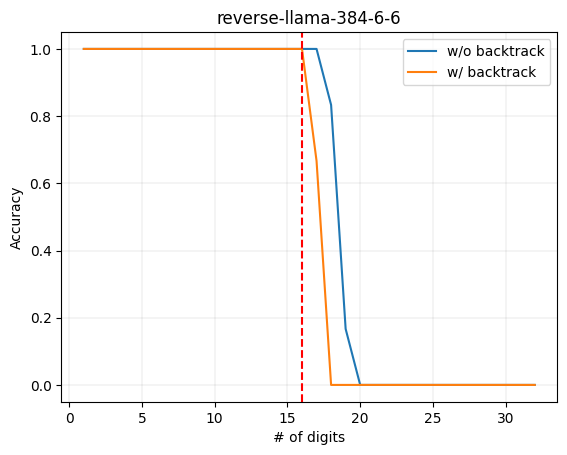

In [32]:
# plot
n_digits = np.arange(1, 33)
back_accuracy = [resul_beam_rope[f"eval_{n}-add-reverse_accuracy"] for n in n_digits]

plt.plot(n_digits, accuracy, label='w/o backtrack')
plt.plot(n_digits, back_accuracy, label='w/ backtrack')
# plot a vertical line at n = 16
plt.axvline(x=16, color='r', linestyle='--')
plt.xlabel('# of digits')
plt.ylabel('Accuracy')
plt.legend()
# add grid with weak grey lines
plt.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)
plt.title('reverse-llama-384-6-6')

plt.show()


In [59]:
input = tokenizer.bos_token+"C6315727365423376+5881339068602876="
model_inputs = tokenizer(input+"", return_tensors='pt', padding='do_not_pad', add_special_tokens=False).to(model.device)

if 'token_type_ids' in model_inputs:
    model_inputs.pop('token_type_ids')

beam_output = model.generate(
    **model_inputs,
    max_new_tokens=20,
    num_beams=20,
    early_stopping=True,
    num_return_sequences=20,
    output_scores=True,
    return_dict_in_generate=True,
)


print_beam_output(input, beam_output)

Answer:
[BOS]C6315727365423376+5881339068602876=12070664241351531	 | 	 addition length: 16
Output:
----------------------------------------------------------------------------------------------------
[BOS]C6315727365423376+5881339068602876=12070664241351531[EOS]	 | 	0.8031312339903146
CORRECT!
[BOS]C6315727365423376+5881339068602876=12070666X4241351531[EOS]	 | 	0.6909414895743717
[BOS]C6315727365423376+5881339068602876=12070661X4241351531[EOS]	 | 	0.6894169817653425
[BOS]C6315727365423376+5881339068602876=12070669X4241351531[EOS]	 | 	0.6889994240153561
[BOS]C6315727365423376+5881339068602876=12070660X4241351531[EOS]	 | 	0.6886305922927447
[BOS]C6315727365423376+5881339068602876=123X070664241351531[EOS]	 | 	0.6856339288421043
[BOS]C6315727365423376+5881339068602876=1207066424135150X31[EOS]	 | 	0.685267123367554
[BOS]C6315727365423376+5881339068602876=4X12070664241351531[EOS]	 | 	0.6830301223275653
[BOS]C6315727365423376+5881339068602876=2X12070664241351531[EOS]	 | 	0.6827399294422392
[B

In [60]:
input = tokenizer.bos_token+"C63157427365423376+58813239068602876="
model_inputs = tokenizer(input+"", return_tensors='pt', padding='do_not_pad', add_special_tokens=False).to(model.device)

if 'token_type_ids' in model_inputs:
    model_inputs.pop('token_type_ids')

beam_output = model.generate(
    **model_inputs,
    max_new_tokens=20,
    num_beams=20,
    early_stopping=True,
    num_return_sequences=20,
    output_scores=True,
    return_dict_in_generate=True,
)


print_beam_output(input, beam_output)

Answer:
[BOS]C63157427365423376+58813239068602876=120707564241351531	 | 	 addition length: 17
Output:
----------------------------------------------------------------------------------------------------
[BOS]C63157427365423376+58813239068602876=120707564241351531[EOS]	 | 	0.8050965824992818
CORRECT!
[BOS]C63157427365423376+58813239068602876=120707564241351530X1	 | 	0.6820532505880839
[BOS]C63157427365423376+58813239068602876=1207075642413515371[EOS]	 | 	0.6802944919618901
[BOS]C63157427365423376+58813239068602876=120707564241351538X1	 | 	0.679695243345933
[BOS]C63157427365423376+58813239068602876=0X120707564241351531	 | 	0.6757454041307273
[BOS]C63157427365423376+58813239068602876=5X120707564241351531	 | 	0.6745735186308288
[BOS]C63157427365423376+58813239068602876=6X120707564241351531	 | 	0.6741532578332409
[BOS]C63157427365423376+58813239068602876=2X120707564241351531	 | 	0.6740645001685865
[BOS]C63157427365423376+58813239068602876=4X120707564241351531	 | 	0.6738694069846406
[BOS]C63

In [77]:
input = tokenizer.bos_token+"C631574273625423376+588132390686032876="
prompt = input
model_inputs = tokenizer(prompt, return_tensors='pt', padding='do_not_pad', add_special_tokens=False).to(model.device)

if 'token_type_ids' in model_inputs:
    model_inputs.pop('token_type_ids')

beam_output = model.generate(
    **model_inputs,
    max_new_tokens=40,
    num_beams=20,
    early_stopping=True,
    num_return_sequences=20,
    output_scores=True,
    return_dict_in_generate=True,
)

print("Prompt:\n"+prompt)
print_beam_output(input, beam_output)

Prompt:
[BOS]C631574273625423376+588132390686032876=
Answer:
[BOS]C631574273625423376+588132390686032876=1207075642125551531	 | 	 addition length: 18
Output:
----------------------------------------------------------------------------------------------------
[BOS]C631574273625423376+588132390686032876=1207075642125251860[EOS]	 | 	0.7404898066440035
[BOS]C631574273625423376+588132390686032876=120707564211X252518760[EOS]	 | 	0.7181554058702949
[BOS]C631574273625423376+588132390686032876=1207075642125251863X0[EOS]	 | 	0.7098825902088546
[BOS]C631574273625423376+588132390686032876=1207075642125255X18760[EOS]	 | 	0.7046201158546906
[BOS]C631574273625423376+588132390686032876=1207075644X21252518760[EOS]	 | 	0.6997051236436386
[BOS]C631574273625423376+588132390686032876=1207075642125259X18760[EOS]	 | 	0.6996496989963575
[BOS]C631574273625423376+588132390686032876=12070756421252518660[EOS]	 | 	0.6964384603083258
[BOS]C631574273625423376+588132390686032876=127X070756421252518760[EOS]	 | 	0.6960

In [78]:
input = tokenizer.bos_token+"C631574273625423376+588132390686032876="
prompt = input + "1207075642125"
model_inputs = tokenizer(prompt, return_tensors='pt', padding='do_not_pad', add_special_tokens=False).to(model.device)

if 'token_type_ids' in model_inputs:
    model_inputs.pop('token_type_ids')

beam_output = model.generate(
    **model_inputs,
    max_new_tokens=2,
    num_beams=20,
    early_stopping=True,
    num_return_sequences=20,
    output_scores=True,
    return_dict_in_generate=True,
)

print("Prompt:\n"+prompt)
print_beam_output(input, beam_output)

Prompt:
[BOS]C631574273625423376+588132390686032876=1207075642125
Answer:
[BOS]C631574273625423376+588132390686032876=1207075642125551531	 | 	 addition length: 18
Output:
----------------------------------------------------------------------------------------------------
[BOS]C631574273625423376+588132390686032876=120707564212525	 | 	0.8001563730176878
[BOS]C631574273625423376+588132390686032876=12070756421257X	 | 	0.15183805656280322
[BOS]C631574273625423376+588132390686032876=12070756421250X	 | 	0.1514245353912174
[BOS]C631574273625423376+588132390686032876=12070756421253X	 | 	0.14979048501326206
[BOS]C631574273625423376+588132390686032876=12070756421254X	 | 	0.1495602429378327
[BOS]C631574273625423376+588132390686032876=12070756421258X	 | 	0.1490435624695235
[BOS]C631574273625423376+588132390686032876=12070756421255X	 | 	0.14877211123344955
[BOS]C631574273625423376+588132390686032876=12070756421259X	 | 	0.1484922501884791
[BOS]C631574273625423376+588132390686032876=12070756421256X	 

In [11]:
input = tokenizer.bos_token+"C631574273625423376+588132390686032876="
prompt = input+"12070756421252"
model_inputs = tokenizer(prompt, return_tensors='pt', padding='do_not_pad', add_special_tokens=False).to(model.device)

if 'token_type_ids' in model_inputs:
    model_inputs.pop('token_type_ids')

beam_output = model.generate(
    **model_inputs,
    max_new_tokens=1,
    num_beams=20,
    early_stopping=True,
    num_return_sequences=20,
    output_scores=True,
    return_dict_in_generate=True,
)
print("Prompt:\n"+prompt)
print_beam_output(input, beam_output)

Prompt:
[BOS]C631574273625423376+588132390686032876=12070756421252
Answer:
[BOS]C631574273625423376+588132390686032876=1207075642125551531	 | 	 addition length: 18
Output:
----------------------------------------------------------------------------------------------------
[BOS]C631574273625423376+588132390686032876=120707564212525	 | 	0.8011321947684736
[BOS]C631574273625423376+588132390686032876=120707564212529	 | 	0.02274406965883215
[BOS]C631574273625423376+588132390686032876=120707564212526	 | 	0.022683228171667576
[BOS]C631574273625423376+588132390686032876=120707564212522	 | 	0.022515475669229443
[BOS]C631574273625423376+588132390686032876=120707564212527	 | 	0.022293781743802952
[BOS]C631574273625423376+588132390686032876=120707564212528	 | 	0.022106819476952935
[BOS]C631574273625423376+588132390686032876=120707564212520	 | 	0.021809691814956372
[BOS]C631574273625423376+588132390686032876=120707564212521	 | 	0.021760089874399265
[BOS]C631574273625423376+588132390686032876=120707

In [79]:
input = tokenizer.bos_token+"C631574273625423376+588132390686032876="
prompt = input+"12070756421252"
model_inputs = tokenizer(prompt, return_tensors='pt', padding='do_not_pad', add_special_tokens=False).to(model.device)

if 'token_type_ids' in model_inputs:
    model_inputs.pop('token_type_ids')

beam_output = model.generate(
    **model_inputs,
    max_new_tokens=3,
    num_beams=20,
    early_stopping=True,
    num_return_sequences=20,
    output_scores=True,
    return_dict_in_generate=True,
)
print("Prompt:\n"+prompt)
print_beam_output(input, beam_output)

Prompt:
[BOS]C631574273625423376+588132390686032876=12070756421252
Answer:
[BOS]C631574273625423376+588132390686032876=1207075642125551531	 | 	 addition length: 18
Output:
----------------------------------------------------------------------------------------------------
[BOS]C631574273625423376+588132390686032876=12070756421252518	 | 	0.7917157341409937
[BOS]C631574273625423376+588132390686032876=1207075642125255X	 | 	0.2855616861248933
[BOS]C631574273625423376+588132390686032876=1207075642125259X	 | 	0.27691022889799194
[BOS]C631574273625423376+588132390686032876=1207075642125250X	 | 	0.27240094200520154
[BOS]C631574273625423376+588132390686032876=1207075642125254X	 | 	0.2716745233203869
[BOS]C631574273625423376+588132390686032876=1207075642125256X	 | 	0.2709313085808692
[BOS]C631574273625423376+588132390686032876=1207075642125253X	 | 	0.26777792768564496
[BOS]C631574273625423376+588132390686032876=1207075642125257X	 | 	0.2666709459432758
[BOS]C631574273625423376+588132390686032876=

In [12]:
input = tokenizer.bos_token+"C631574273625423376+588132390686032876="
prompt = input+"12070756421252X"
model_inputs = tokenizer(prompt, return_tensors='pt', padding='do_not_pad', add_special_tokens=False).to(model.device)

if 'token_type_ids' in model_inputs:
    model_inputs.pop('token_type_ids')

beam_output = model.generate(
    **model_inputs,
    max_new_tokens=1,
    num_beams=20,
    early_stopping=True,
    num_return_sequences=20,
    output_scores=True,
    return_dict_in_generate=True,
)
print("Prompt:\n"+prompt)
print_beam_output(input, beam_output)

Prompt:
[BOS]C631574273625423376+588132390686032876=12070756421252X
Answer:
[BOS]C631574273625423376+588132390686032876=1207075642125551531	 | 	 addition length: 18
Output:
----------------------------------------------------------------------------------------------------
[BOS]C631574273625423376+588132390686032876=12070756421252X5	 | 	0.7951272863191071
[BOS]C631574273625423376+588132390686032876=12070756421252X6	 | 	0.027602787781293166
[BOS]C631574273625423376+588132390686032876=12070756421252X9	 | 	0.027447643590203862
[BOS]C631574273625423376+588132390686032876=12070756421252X0	 | 	0.026400244447275827
[BOS]C631574273625423376+588132390686032876=12070756421252X7	 | 	0.025650810412409863
[BOS]C631574273625423376+588132390686032876=12070756421252X3	 | 	0.02557493005353932
[BOS]C631574273625423376+588132390686032876=12070756421252X1	 | 	0.024523540731112195
[BOS]C631574273625423376+588132390686032876=12070756421252X8	 | 	0.023351620435424287
[BOS]C631574273625423376+5881323906860328

In [13]:
input = tokenizer.bos_token+"C631574273625423376+588132390686032876="
prompt = input+"12070756421252X5"
model_inputs = tokenizer(prompt, return_tensors='pt', padding='do_not_pad', add_special_tokens=False).to(model.device)

if 'token_type_ids' in model_inputs:
    model_inputs.pop('token_type_ids')

beam_output = model.generate(
    **model_inputs,
    max_new_tokens=1,
    num_beams=20,
    early_stopping=True,
    num_return_sequences=20,
    output_scores=True,
    return_dict_in_generate=True,
)
print("Prompt:\n"+prompt)
print_beam_output(input, beam_output)

Prompt:
[BOS]C631574273625423376+588132390686032876=12070756421252X5
Answer:
[BOS]C631574273625423376+588132390686032876=1207075642125551531	 | 	 addition length: 18
Output:
----------------------------------------------------------------------------------------------------
[BOS]C631574273625423376+588132390686032876=12070756421252X5X	 | 	0.6180799171462493
[BOS]C631574273625423376+588132390686032876=12070756421252X56	 | 	0.2104492431034329
[BOS]C631574273625423376+588132390686032876=12070756421252X55	 | 	0.04831970600868915
[BOS]C631574273625423376+588132390686032876=12070756421252X59	 | 	0.020119175476134253
[BOS]C631574273625423376+588132390686032876=12070756421252X54	 | 	0.01886965316098258
[BOS]C631574273625423376+588132390686032876=12070756421252X57	 | 	0.015767918320079538
[BOS]C631574273625423376+588132390686032876=12070756421252X50	 | 	0.0156558607602478
[BOS]C631574273625423376+588132390686032876=12070756421252X58	 | 	0.014824636083352083
[BOS]C631574273625423376+588132390686

In [80]:
input = tokenizer.bos_token+"C631574273625423376+588132390686032876="
prompt = input+"12070756421252X"
model_inputs = tokenizer(prompt, return_tensors='pt', padding='do_not_pad', add_special_tokens=False).to(model.device)

if 'token_type_ids' in model_inputs:
    model_inputs.pop('token_type_ids')

beam_output = model.generate(
    **model_inputs,
    max_new_tokens=3,
    num_beams=20,
    early_stopping=True,
    num_return_sequences=20,
    output_scores=True,
    return_dict_in_generate=True,
)
print("Prompt:\n"+prompt)
print_beam_output(input, beam_output)

Prompt:
[BOS]C631574273625423376+588132390686032876=12070756421252X
Answer:
[BOS]C631574273625423376+588132390686032876=1207075642125551531	 | 	 addition length: 18
Output:
----------------------------------------------------------------------------------------------------
[BOS]C631574273625423376+588132390686032876=12070756421252X5X5	 | 	0.46408455497785805
[BOS]C631574273625423376+588132390686032876=12070756421252X565	 | 	0.40943641542905923
[BOS]C631574273625423376+588132390686032876=12070756421252X5X3	 | 	0.37324450864304437
[BOS]C631574273625423376+588132390686032876=12070756421252X5X9	 | 	0.370110817746491
[BOS]C631574273625423376+588132390686032876=12070756421252X5X0	 | 	0.36546804972122465
[BOS]C631574273625423376+588132390686032876=12070756421252X5X7	 | 	0.3610870023799838
[BOS]C631574273625423376+588132390686032876=12070756421252X5X8	 | 	0.36007115330105627
[BOS]C631574273625423376+588132390686032876=12070756421252X5X1	 | 	0.35520996280294953
[BOS]C631574273625423376+58813239

## Backtrack, with NoPE

In [33]:
argv = shlex.split("""
    --report_to="none" \
    --architecture=llama \
    --from_pretrained=False \
    --hidden_size=384 \
    --intermediate_size=1536 \
    --num_attention_heads=6 \
    --num_layers=6 \
    --max_position_embeddings=1024 \
    --rope_theta=Inf \
    \
    \
    --num_train=20000000 \
    --n_digits_train='1,17' \
    --op_train='add' \
    --format_train='backtrack' \
    --op_dist_train='1' \
    --n_digits_eval='1,33,1' \
    --op_eval='add' \
    --format_eval='reverse' \
    --op_dist_eval='1' \
    --show_task_ids=True \
    --padding_side='right' \
    \
    \
    --do_backtrack_decoding=True \
    --save_total_limit=1 \
    --run_name='backtrack' \
    --resume_from_checkpoint='out/backtrack-llama-384-6-6-1024-backtrack-digits-1_17_/checkpoint-10000' \
    --output_dir=out \
    --do_train=False \
    --do_eval=True \
    --max_steps=10000 \
    --learning_rate=5e-4 \
    --lr_scheduler_type='warmup_stable_decay' \
    --lr_scheduler_kwargs='{"num_stable_steps": 6000, "num_decay_steps": 2000}' \
    --adam_beta2=0.98 \
    --adam_epsilon=1e-12 \
    --weight_decay=0.01 \
    --warmup_ratio=0.2 \
    --logging_steps=20 \
    --eval_strategy="steps" \
    --eval_steps=500 \
    --predict_with_generate \
    --remove_unused_columns=False \
    --per_device_train_batch_size=2048 \
    --per_device_eval_batch_size=1024 \
    --gradient_accumulation_steps=1 \
    --include_inputs_for_metrics=True \
    --save_steps=500 \
    --torch_compile=True \
    --tf32=True 
""")


sys.argv = sys.argv[:1] + argv
print(sys.argv)


['/home/ny/anaconda3/envs/hf/lib/python3.10/site-packages/ipykernel_launcher.py', '--report_to=none', '--architecture=llama', '--from_pretrained=False', '--hidden_size=384', '--intermediate_size=1536', '--num_attention_heads=6', '--num_layers=6', '--max_position_embeddings=1024', '--rope_theta=Inf', '--num_train=20000000', '--n_digits_train=1,17', '--op_train=add', '--format_train=backtrack', '--op_dist_train=1', '--n_digits_eval=1,33,1', '--op_eval=add', '--format_eval=reverse', '--op_dist_eval=1', '--show_task_ids=True', '--padding_side=right', '--do_backtrack_decoding=True', '--save_total_limit=1', '--run_name=backtrack', '--resume_from_checkpoint=out/backtrack-llama-384-6-6-1024-backtrack-digits-1_17_/checkpoint-10000', '--output_dir=out', '--do_train=False', '--do_eval=True', '--max_steps=10000', '--learning_rate=5e-4', '--lr_scheduler_type=warmup_stable_decay', '--lr_scheduler_kwargs={"num_stable_steps": 6000, "num_decay_steps": 2000}', '--adam_beta2=0.98', '--adam_epsilon=1e-12'

In [34]:
args, model_args, data_args, train_args = get_args()

tokenizer = get_tokenizer(model_args, data_args)

model = get_model(train_args, model_args, tokenizer)

train_args = prepare_train_args(train_args, model_args, data_args, tokenizer)

trainer = get_trainer(args, data_args, model_args, model, tokenizer, train_args, train_dataset, eval_datasets)

trainer._load_from_checkpoint(resume_from_checkpoint=train_args.resume_from_checkpoint)

model

/home/ny/anaconda3/envs/hf/lib/python3.10/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
max_steps is given, it will override any value given in num_train_epochs


Number of parameters: 14239872
Number of trainable parameters: 14239872


LlamaForCausalLMWithNoPE(
  (model): LlamaModelWithNoPE(
    (embed_tokens): Embedding(103, 384)
    (layers): ModuleList(
      (0-5): 6 x LlamaDecoderLayer(
        (self_attn): LlamaSdpaAttention(
          (q_proj): Linear(in_features=384, out_features=384, bias=False)
          (k_proj): Linear(in_features=384, out_features=384, bias=False)
          (v_proj): Linear(in_features=384, out_features=384, bias=False)
          (o_proj): Linear(in_features=384, out_features=384, bias=False)
          (rotary_emb): LlamaRotaryEmbedding()
        )
        (mlp): LlamaMLP(
          (gate_proj): Linear(in_features=384, out_features=1536, bias=False)
          (up_proj): Linear(in_features=384, out_features=1536, bias=False)
          (down_proj): Linear(in_features=1536, out_features=384, bias=False)
          (act_fn): SiLU()
        )
        (input_layernorm): LlamaRMSNorm((384,), eps=1e-06)
        (post_attention_layernorm): LlamaRMSNorm((384,), eps=1e-06)
      )
    )
    (norm): 

In [35]:
resul_beam_nope = trainer.evaluate()


Prompt: '[BOS]C6+1='
Pred  : '70[EOS][PAD][PAD][PAD][PAD][PAD][PAD]'
Label : '70[EOS]'
Prompt: '[BOS]C8+7='
Pred  : '51[EOS][PAD][PAD][PAD][PAD][PAD][PAD]'
Label : '51[EOS]'
Prompt: '[BOS]C8+8='
Pred  : '61[EOS][PAD][PAD][PAD][PAD][PAD][PAD]'
Label : '61[EOS]'
Prompt: '[BOS]C3+9='
Pred  : '21[EOS][PAD][PAD][PAD][PAD][PAD][PAD]'
Label : '21[EOS]'
Prompt: '[BOS]C1+2='
Pred  : '30[EOS][PAD][PAD][PAD][PAD][PAD][PAD]'
Label : '30[EOS]'
Prompt: '[BOS]C06+46='
Pred  : '421[EOS][PAD][PAD][PAD][PAD][PAD][PAD][PAD][PAD]'
Label : '421[EOS]'
Prompt: '[BOS]C25+78='
Pred  : '931[EOS][PAD][PAD][PAD][PAD][PAD][PAD][PAD][PAD]'
Label : '931[EOS]'
Prompt: '[BOS]C83+48='
Pred  : '221[EOS][PAD][PAD][PAD][PAD][PAD][PAD][PAD][PAD]'
Label : '221[EOS]'
Prompt: '[BOS]C46+97='
Pred  : '341[EOS][PAD][PAD][PAD][PAD][PAD][PAD][PAD][PAD]'
Label : '341[EOS]'
Prompt: '[BOS]C34+18='
Pred  : '421[EOS][PAD][PAD][PAD][PAD][PAD][PAD][PAD][PAD]'
Label : '421[EOS]'
Prompt: '[BOS]C506+675='
Pred  : '1811[EOS][PAD][PAD][PAD][P

In [ ]:
resul_beam_nope

{'eval_1-add-reverse_model_preparation_time': 0.0019,
 'eval_1-add-reverse_accuracy': 1.0,
 'eval_1-add-reverse_distance': 1.0,
 'eval_1-add-reverse_runtime': 0.2779,
 'eval_1-add-reverse_samples_per_second': 345.475,
 'eval_1-add-reverse_steps_per_second': 3.599,
 'eval_2-add-reverse_model_preparation_time': 0.0019,
 'eval_2-add-reverse_accuracy': 1.0,
 'eval_2-add-reverse_distance': 1.0,
 'eval_2-add-reverse_runtime': 0.2857,
 'eval_2-add-reverse_samples_per_second': 336.061,
 'eval_2-add-reverse_steps_per_second': 3.501,
 'eval_3-add-reverse_model_preparation_time': 0.0019,
 'eval_3-add-reverse_accuracy': 1.0,
 'eval_3-add-reverse_distance': 1.0,
 'eval_3-add-reverse_runtime': 0.285,
 'eval_3-add-reverse_samples_per_second': 336.784,
 'eval_3-add-reverse_steps_per_second': 3.508,
 'eval_4-add-reverse_model_preparation_time': 0.0019,
 'eval_4-add-reverse_accuracy': 1.0,
 'eval_4-add-reverse_distance': 1.0,
 'eval_4-add-reverse_runtime': 0.2865,
 'eval_4-add-reverse_samples_per_second

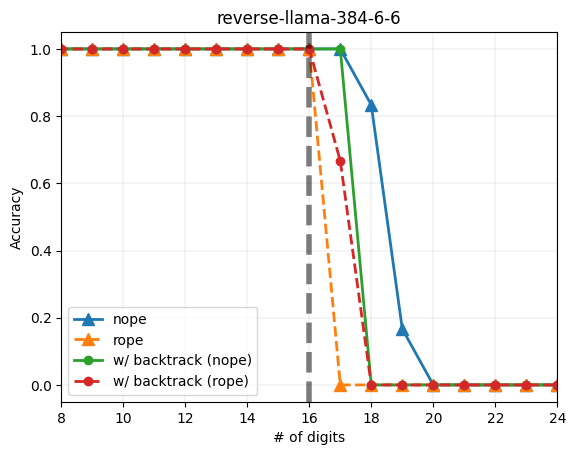

In [55]:
# plot
n_digits = np.arange(1, 33)
accuracy_rope = [result_rope[f"eval_{n}-add-reverse_accuracy"] for n in n_digits]
back_accuracy_rope = [resul_beam_rope[f"eval_{n}-add-reverse_accuracy"] for n in n_digits]
back_accuracy_nope = [resul_beam_nope[f"eval_{n}-add-reverse_accuracy"] for n in n_digits]

plt.plot(n_digits, accuracy, label='nope', linewidth=2,  marker='^', markersize=8)
plt.plot(n_digits, accuracy_rope, label='rope', linewidth=2, linestyle='--', marker='^', markersize=8)
plt.plot(n_digits, back_accuracy_nope, label='w/ backtrack (nope)', linewidth=2,  marker='o',)
plt.plot(n_digits, back_accuracy_rope, label='w/ backtrack (rope)', linewidth=2, linestyle='--', marker='o',)
# plot a vertical line at n = 16 
plt.axvline(x=16, linestyle='--', linewidth=4, c='black', alpha=0.5)
plt.xlabel('# of digits')
plt.ylabel('Accuracy')
plt.xlim(8, 24)
plt.legend()
# add grid with weak grey lines
plt.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)
plt.title('reverse-llama-384-6-6')

plt.show()


In [1]:
s = "\nC0P02373503+38325528=A0B3S3D3\nC0P2373503+8325528=A2B8S0D30\nC0P373503+325528=A3B3S6D307\nC1P73503+25528=A7B2S9D3079\nC0P3503+5528=A3B5S8D30798\nC0P503+528=A5B5S0D307980\nC0P03+28=A0B2S2D3079803\nC1P3+8=A3B8S1D30798031\nC0P =A B S D307980311[EOS]"
print(s)


C0P02373503+38325528=A0B3S3D3
C0P2373503+8325528=A2B8S0D30
C0P373503+325528=A3B3S6D307
C1P73503+25528=A7B2S9D3079
C0P3503+5528=A3B5S8D30798
C0P503+528=A5B5S0D307980
C0P03+28=A0B2S2D3079803
C1P3+8=A3B8S1D30798031
C0P =A B S D307980311[EOS]


In [11]:
from random import randint, choice, sample, shuffle, random


def get_random_truncated_number(a, b):
    # for string a, b (numbers), return a length-1 truncated version of a or b (or both)
    if len(a) == 1 and len(b) == 1:
        orig_a, orig_b = a, b
        # re-pick both numbers until a != a and b != b
        while a == orig_a and b == orig_b:
            a = str(randint(0, 9))
            b = str(randint(0, 9))
    elif len(a) == 1:
        # randomly drop one digit from b from any position of b
        i = randint(0, len(b) - 1)
        b = b[:i] + b[i+1:]
    elif len(b) == 1:
        # randomly drop one digit from a from any position of a
        i = randint(0, len(a) - 1)
        a = a[:i] + a[i+1:]
    else:
        # randomly drop one digit from a or b (or both)
        if random() < 0.5:
            i = randint(0, len(a) - 1)
            a = a[:i] + a[i+1:]
            i = randint(0, len(b) - 1)
            b = b[:i] + b[i+1:]
        else:
            if random() < 0.5:
                i = randint(0, len(a) - 1)
                a = a[:i] + a[i+1:]
            else:
                i = randint(0, len(b) - 1)
                b = b[:i] + b[i+1:]
    return a, b



def split_digits(a, b):
    a_digits = []
    b_digits = []
    carries = [0]
    while True:
        a_digits.append(a % 10)
        b_digits.append(b % 10)
        carries.append((a % 10 + b % 10) // 10)
        a //= 10
        b //= 10
        if a == 0 and b == 0:
            break
    return a_digits, b_digits, carries


def get_truncated_cot(l):
    # for dpo: get randomly truncated cot for l
    # l: string of prompt ex. [BOS]Q412661+1941=
    a, b = l.split('+')
    a = a[6:]
    b = b[:-1]
    a, b = get_random_truncated_number(a, b)

    a_digits, b_digits, carries = split_digits(int(a), int(b))
    a_str = ''.join(map(str, a_digits))
    b_str = ''.join(map(str, b_digits))

    prompt = ''
    cot = ''
    ans = str(int(a) + int(b))[::-1] # left justify means padding on the right
    
    abc_list = list(enumerate(zip(a_digits, b_digits, carries)))
    k = len(abc_list)
    j = 0
    for i, (a_i, b_i, c_i) in abc_list[j:j+k]:
        if i == j:
            if i - 1 >= 0:
                c_prev = carries[i-1]
                ans_prev = ans[:i]
            else:
                c_prev = 0
                ans_prev = ''
            # prompt = f'D{ans_prev}\nC{c_prev}P{a_str[i:]}+{b_str[i:]}='
            prompt = f'Q{str(a)}+{str(b)}='
            cot += f'\nC0P{a_str[i:]}+{b_str[i:]}='
            cot += f'A{a_i}B{b_i}S{(a_i + b_i) % 10}D{ans[:i+1]}\nC{c_i}'            
        else:
            cot += f'P{a_str[i:]}+{b_str[i:]}=A{a_i}B{b_i}S{(a_i + b_i) % 10}D{ans[:i+1]}\nC{c_i}'
    cot += f'P =A B S D{ans}'
    # if train:
    #     print(prompt + cot)
    #     breakpoint()
    return cot


In [13]:

l = "[BOS]Q30537320+82552383="

print(get_truncated_cot(l))


C0P2373503+8325528=A2B8S0D0
C0P373503+325528=A3B3S6D07
C1P73503+25528=A7B2S9D079
C0P3503+5528=A3B5S8D0798
C0P503+528=A5B5S0D07980
C0P03+28=A0B2S2D079803
C1P3+8=A3B8S1D0798031
C0P =A B S D07980311
